In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings("ignore")

# Data collecting

In [2]:
data = pd.read_csv("data.csv", on_bad_lines = 'skip')

# Data visualization

In [3]:
data.head(5)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data.shape

(669640, 2)

In [5]:
data.columns

Index(['password', 'strength'], dtype='object')

In [6]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# Data preproccesing

## Null values

In [7]:
data.isnull().sum()

password    1
strength    0
dtype: int64

### Remove null values

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [10]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [11]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# Data analysis

<Axes: xlabel='strength', ylabel='count'>

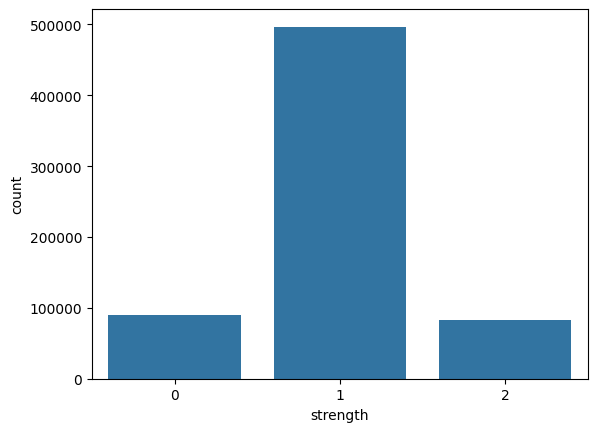

In [12]:
sns.countplot(x = data["strength"] )

In [13]:
data_array = np.array(data)

In [14]:
data_array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

## Creating feature columns from text

In [15]:
import random

In [16]:
random.shuffle(data_array)

In [17]:
data_array.shape

(669639, 2)

### Defining dependant and independant data

In [18]:
y = [listing[1] for listing in data_array]
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,


In [19]:
x = [listing[0] for listing in data_array]
x

['kzde5577',
 'kzde5577',
 'visi7k1yr',
 'megzy123',
 'kzde5577',
 'visi7k1yr',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'universe2908',
 'asv5o9yu',
 'universe2908',
 'jytifok873',
 'v1118714',
 'v1118714',
 'AVYq1lDE4MgAZfNt',
 'WUt9IZzE0OQ7PkNE',
 '52558000aaa',
 'v1118714',
 'universe2908',
 'AVYq1lDE4MgAZfNt',
 'g067057895',
 'asv5o9yu',
 'idofo673',
 'v1118714',
 'czuodhj972',
 '612035180tok',
 'cigicigi123',
 'kzde5577',
 'intel1',
 '52558000aaa',
 '612035180tok',
 'klara-tershina3H',
 'prisonbreak1',
 '0169395484a',
 'gaymaids1',
 'lamborghin1',
 'asgaliu11',
 'kswa2mrv',
 'yitbos77',
 'memjan123',
 'asv5o9yu',
 '0169395484a',
 'megzy123',
 '0169395484a',
 'g067057895',
 'asv5o9yu',
 'faranumar91',
 'lamborghin1',
 'TyWM72UNEex8Q8Y',
 'elyass15@ajilent-ci',
 'idofo673',
 'g067057895',
 'g067057895',
 'fahad123',
 'elyass15@ajilent-ci',
 'pHyqueDIyNQ8vmhb',
 'WUt9IZzE0OQ7PkNE',
 'faranumar91',
 'idofo673',
 'gaymaids1',
 'b4NbTxDEyNgG141J',
 'visi7k1yr',
 'memjan123',
 'bozoxik60

### Splitting text

In [20]:
def word_split(string):
    string1 = []
    for char in string:
        string1.append(char)
    return string1

In [21]:
word_split("hbfjd")

['h', 'b', 'f', 'j', 'd']

##  Vectorize whole X

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tf = TfidfVectorizer(tokenizer=word_split)

In [24]:
X = tf.fit_transform(x)

Now we have created ann instance of tf with desired configurations. That means x is now vectorized. So, it can be used for ML.

In [25]:
X.shape

(669639, 128)

In [26]:
features = tf.get_feature_names_out() 
len(features)

128

## Lets calculate TF-IDF values for one password (The first one)

In [27]:
first_doc = X[0]
first_doc
importance = first_doc.T.todense()
importance

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56647889],
        [0.        ],
        [0.59172817],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [28]:
X_dataframe = pd.DataFrame(importance,index = features, columns=["TF-IDF"])

In [29]:
X_dataframe

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
œ,0.0
‚,0.0
…,0.0
‹,0.0


In [30]:
X_dataframe.sort_values(by ="TF-IDF", ascending=False)

,TF-IDF
7,0.591728
5,0.566479
z,0.336710
k,0.291429
d,0.285923
...,...
9,0.000000
8,0.000000
6,0.000000
4,0.000000


# Data Modeling

This data consists of Chategorical prediction data. So the algorithm to be used here will be a classification algorithm.

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X

<669639x128 sparse matrix of type '<class 'numpy.float64'>'
	with 5644018 stored elements in Compressed Sparse Row format>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
log_reg = LogisticRegression(multi_class='multinomial',solver='newton-cg', random_state=40)

In [36]:
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=40,
                   solver='newton-cg')

In [37]:
joblib.dump(log_reg, 'password_prediction_model.joblib')

['password_prediction_model.joblib']

In [38]:
log_reg = joblib.load('password_prediction_model.joblib')

In [39]:
sample = np.array(["shbhwbh6332"])
pred = tf.transform(sample)
log_reg.predict(pred)

array([1])

In [40]:
X_test

<133928x128 sparse matrix of type '<class 'numpy.float64'>'
	with 1129317 stored elements in Compressed Sparse Row format>

In [41]:
y_pred = log_reg.predict(X_test)

In [42]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[ 5323, 12438,    14],
       [ 3979, 93063,  2520],
       [   33,  5107, 11451]], dtype=int64)

In [46]:
score = accuracy_score(y_test, y_pred)

In [47]:
print("Accuracy score is : {}".format(score))

Accuracy score is : 0.8201197658443342


In [48]:
from sklearn.metrics import classification_report

In [49]:
print("Here is the classification report : \n\n{}".format(classification_report(y_test, y_pred)))

Here is the classification report : 

              precision    recall  f1-score   support

           0       0.57      0.30      0.39     17775
           1       0.84      0.93      0.89     99562
           2       0.82      0.69      0.75     16591

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



In [57]:
def predict_strength(password):
    sample = np.array([password])
    pred = tf.transform(sample)
    level = log_reg.predict(pred)

    if level[0] == 0:
        return "Weak"
    elif level[0] == 1: 
        return "Medium"
    else:
        return "Strong"

strength of the password is : Strong


In [65]:
input_password = input("Enter the password to check the strength : ")
strength = predict_strength(input_password)
print("strength of the password is : {}".format(strength))

strength of the password is : Strong
